In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the data

In [2]:
# Load the training data
training_beneficiary_df = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Beneficiarydata-1542865627584.csv')
training_inpatientdata_df = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Inpatientdata-1542865627584.csv')
training_outpatientdata_df = pd.read_csv('Medicare-Fraud-Detection-DS/Train_Outpatientdata-1542865627584.csv')
training_provider_df = pd.read_csv('Medicare-Fraud-Detection-DS/Train-1542865627584.csv')

# Load the test data
test_beneficiary_df = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Beneficiarydata-1542969243754.csv')
test_inpatientdata_df = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Inpatientdata-1542969243754.csv')
test_outpatientdata_df = pd.read_csv('Medicare-Fraud-Detection-DS/Test_Outpatientdata-1542969243754.csv')
test_provider_df = pd.read_csv('Medicare-Fraud-Detection-DS/Test-1542969243754.csv') 

In [3]:
# Shape of the datasets
print(f'Shape of Training Beneficiary Data: {training_beneficiary_df.shape}')
print(f'Shape of Training Inpatient Data: {training_inpatientdata_df.shape}')
print(f'Shape of Training Outpatient Data: {training_outpatientdata_df.shape}')
print(f'Shape of Training Provider Data: {training_provider_df.shape}')

print(f'Shape of Test Beneficiary Data: {test_beneficiary_df.shape}')
print(f'Shape of Test Inpatient Data: {test_inpatientdata_df.shape}')
print(f'Shape of Test Outpatient Data: {test_outpatientdata_df.shape}')
print(f'Shape of Test Provider Data: {test_provider_df.shape}')

Shape of Training Beneficiary Data: (138556, 25)
Shape of Training Inpatient Data: (40474, 30)
Shape of Training Outpatient Data: (517737, 27)
Shape of Training Provider Data: (5410, 2)
Shape of Test Beneficiary Data: (63968, 25)
Shape of Test Inpatient Data: (9551, 30)
Shape of Test Outpatient Data: (125841, 27)
Shape of Test Provider Data: (1353, 1)


In [4]:
training_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [5]:
training_inpatientdata_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [6]:
training_outpatientdata_df.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [7]:
training_provider_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [8]:
# Features in the 'Training Beneficiary data' dataset
training_beneficiary_df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [9]:
# Features in the 'Training Inpatient data' dataset
training_inpatientdata_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [10]:
# Features in the 'Training Outpatient data' dataset
training_outpatientdata_df.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [11]:
# Features in the 'Training Provider data' dataset
training_provider_df.columns

Index(['Provider', 'PotentialFraud'], dtype='object')

#### Analyze the Training Beneficiary data

In [12]:
training_beneficiary_df.describe()

,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
count,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,...,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000,138556.000000
mean,1.570932,1.254511,25.666734,374.424745,11.907727,11.910145,1.667817,1.506322,1.687643,1.880041,...,1.644476,1.398142,1.324143,1.725317,1.743180,1.920942,3660.346502,399.847296,1298.219348,377.718258
std,0.494945,0.717007,15.223443,266.277581,1.032332,0.936893,0.470998,0.499962,0.463456,0.324914,...,0.478674,0.489517,0.468056,0.446356,0.436881,0.269831,9568.621827,956.175202,2493.901134,645.530187
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-8000.000000,0.000000,-70.000000,0.000000
25%,1.000000,1.000000,11.000000,141.000000,12.000000,12.000000,1.000000,1.000000,1.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,170.000000,40.000000
50%,2.000000,1.000000,25.000000,340.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,0.000000,0.000000,570.000000,170.000000
75%,2.000000,1.000000,39.000000,570.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2280.000000,1068.000000,1500.000000,460.000000
max,2.000000,5.000000,54.000000,999.000000,12.000000,12.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,161470.000000,38272.000000,102960.000000,13840.000000


In [13]:
training_beneficiary_df.isna().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [14]:
# check data type of each column
training_beneficiary_df.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [15]:
## calculate the unique values of each column of the training_beneficiary_df
unique_values = []
for col in training_beneficiary_df.columns:
    unique_values.append([col, training_beneficiary_df[col].nunique()])
    
unique_values_df = pd.DataFrame(unique_values, columns=['Column', 'Unique Values'])
unique_values_df

,Column,Unique Values
0,BeneID,138556
1,DOB,900
2,DOD,11
3,Gender,2
4,Race,4
5,RenalDiseaseIndicator,2
6,State,52
7,County,314
8,NoOfMonths_PartACov,13
9,NoOfMonths_PartBCov,13


In [16]:
# Checking the values in the column contains two unique values
for feature in training_beneficiary_df.columns:
    if len(training_beneficiary_df[feature].unique()) == 2:
        print(f' {feature}: {training_beneficiary_df[feature].unique()}')

 Gender: [1 2]
 RenalDiseaseIndicator: ['0' 'Y']
 ChronicCond_Alzheimer: [1 2]
 ChronicCond_Heartfailure: [2 1]
 ChronicCond_KidneyDisease: [1 2]
 ChronicCond_Cancer: [2 1]
 ChronicCond_ObstrPulmonary: [2 1]
 ChronicCond_Depression: [1 2]
 ChronicCond_Diabetes: [1 2]
 ChronicCond_IschemicHeart: [1 2]
 ChronicCond_Osteoporasis: [2 1]
 ChronicCond_rheumatoidarthritis: [1 2]
 ChronicCond_stroke: [1 2]


In [17]:
# For all the Chronic condition, we have two classes: 1 and 2. Here, we will replace 2 by 0.
training_beneficiary_df = training_beneficiary_df.replace({'ChronicCond_Alzheimer': 2, 'ChronicCond_Heartfailure': 2, 
                                                    'ChronicCond_KidneyDisease': 2, 'ChronicCond_Cancer': 2, 
                                                    'ChronicCond_ObstrPulmonary': 2, 'ChronicCond_Depression': 2, 
                                                    'ChronicCond_Diabetes': 2, 'ChronicCond_IschemicHeart': 2, 
                                                    'ChronicCond_Osteoporasis': 2, 'ChronicCond_rheumatoidarthritis': 2, 
                                                    'ChronicCond_stroke': 2}, 0)

training_beneficiary_df = training_beneficiary_df.replace({'RenalDiseaseIndicator': 'Y'}, 1)

In [18]:
training_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,0,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,0,0,1,0,0,0,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,0,1,1,1,1,0,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,0,1,0,0,0,0,0,0,1790,1200


In [19]:
# Create 'Age' feature for the Beneficiary data using DOB and DOD
training_beneficiary_df['DOB'] = pd.to_datetime(training_beneficiary_df['DOB'], format='%Y-%m-%d') #changing the data type of DOB to datetime
training_beneficiary_df['DOD'] = pd.to_datetime(training_beneficiary_df['DOD'], format='%Y-%m-%d') #changing the data type of DOD to datetime
training_beneficiary_df['Age'] = round(((training_beneficiary_df['DOD'] - training_beneficiary_df['DOB']).dt.days)/365) #calculating the age of the beneficiary (in years)

In [20]:
# print the first and last DOD date
print(f"First DOD date: {training_beneficiary_df['DOD'].min()}")
print(f"Last DOD date: {training_beneficiary_df['DOD'].max()}")

First DOD date: 2009-02-01 00:00:00
Last DOD date: 2009-12-01 00:00:00


In [21]:
training_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,NaN
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,NaN
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,NaN
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,NaN
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,NaN


In [22]:
age_fill_value = round(((pd.to_datetime('2009-12-01', format='%Y-%m-%d') - training_beneficiary_df['DOB']).dt.days) / 365)
training_beneficiary_df['Age'] = training_beneficiary_df['Age'].fillna(age_fill_value)

In [23]:
training_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,1,0,1,1,36000,3204,60,70,67.0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,0,30,50,73.0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,0,1,0,0,0,0,0,90,40,73.0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,1,0,0,0,1810,760,87.0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,1,0,0,0,0,0,0,1790,1200,74.0


In [24]:
# Create a new feature 'Whether_Dead' using the 'DOD' feature
# If missing value, then "not dead" else "dead"
training_beneficiary_df['WhetherDead'] = training_beneficiary_df['DOD'].apply(lambda x: 0 if pd.isnull(x) else 1)

In [25]:
training_beneficiary_df.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE11001,1943-01-01,NaT,1,1,0,39,230,12,12,...,1,0,1,1,36000,3204,60,70,67.0,0
1,BENE11002,1936-09-01,NaT,2,1,0,39,280,12,12,...,0,0,0,0,0,0,30,50,73.0,0
2,BENE11003,1936-08-01,NaT,1,1,0,52,590,12,12,...,1,0,0,0,0,0,90,40,73.0,0
3,BENE11004,1922-07-01,NaT,1,1,0,39,270,12,12,...,1,1,1,0,0,0,1810,760,87.0,0
4,BENE11005,1935-09-01,NaT,1,1,0,24,680,12,12,...,0,0,0,0,0,0,1790,1200,74.0,0


#### Analyze the Inpatient data

In [26]:
training_inpatientdata_df.isna().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [27]:
# Create a new feature 'Admit_For_Days'
training_inpatientdata_df['AdmissionDt'] = pd.to_datetime(training_inpatientdata_df['AdmissionDt'], format='%Y-%m-%d') #changing the data type of AdmissionDt to datetime
training_inpatientdata_df['DischargeDt'] = pd.to_datetime(training_inpatientdata_df['DischargeDt'], format='%Y-%m-%d') #changing the data type of DischargeDt to datetime
training_inpatientdata_df['Admit_For_Days'] = (training_inpatientdata_df['DischargeDt'] - training_inpatientdata_df['AdmissionDt']).dt.days + 1 #calculating the number of days the patient was admitted

In [28]:
# Minimum and maximum value for 'Admit_For_Days'
print(f'Minimum value for Admit_For_Days: {training_inpatientdata_df["Admit_For_Days"].min()}')
print(f'Maximum value for Admit_For_Days: {training_inpatientdata_df["Admit_For_Days"].max()}')

Minimum value for Admit_For_Days: 1
Maximum value for Admit_For_Days: 36


In [29]:
# Check NULL values in the 'Admit_For_Days' feature
print(f'{training_inpatientdata_df["Admit_For_Days"].isna().sum()}')
print(f'{training_inpatientdata_df["Admit_For_Days"].isnull().sum()}')

0
0


#### Analyse 'OutPatient' Data

In [30]:
training_outpatientdata_df.isna().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

#### Analyse the "Provider Data"

In [31]:
training_provider_df.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [32]:
# Check missing values in the 'training_provider_df' dataset
print(f'Training: total missing values {training_provider_df.isna().sum()}')

print(f'\n\nTraining: total missing values {training_provider_df.isnull().sum().sum()}')

Training: total missing values Provider          0
PotentialFraud    0
dtype: int64


Training: total missing values 0


In [33]:
training_inpatientdata_df.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7


In [34]:
training_outpatientdata_df.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409


In [35]:
print(f"Training INPATIENT: {training_inpatientdata_df['BeneID'].nunique()}, Training OUTPATIENT: {training_outpatientdata_df['BeneID'].nunique()}")

Training INPATIENT: 31289, Training OUTPATIENT: 133980


In [36]:
print(f"Training INPATIENT ClaimID: {training_inpatientdata_df['ClaimID'].nunique()}, Training OUTPATIENT ClaimID: {training_outpatientdata_df['ClaimID'].nunique()}")

Training INPATIENT ClaimID: 40474, Training OUTPATIENT ClaimID: 517737


In [37]:
# group by 'BeneID' and count the number of claims
training_inpatientdata_df.groupby('BeneID')['ClaimID'].count().sort_values(ascending=False).head()

BeneID
BENE134170    8
BENE64791     7
BENE119457    7
BENE121796    7
BENE62091     7
Name: ClaimID, dtype: int64

In [38]:
print(f'Training INPATIENT: {training_inpatientdata_df["ClaimID"].nunique(), len(training_inpatientdata_df)}')

Training INPATIENT: (40474, 40474)


In [39]:
# It means that the same beneficiary has multiple claims. Can it be the case that a benificiary can take multiple claims on the same day?

## group by 'BeneID'=BENE134170, output the 'ClaimID', 'ClaimStartDt' and 'ClaimEndDt'
training_inpatientdata_df[training_inpatientdata_df['BeneID'] == 'BENE134170'][['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt']]

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt
33638,BENE134170,CLM33864,2009-01-14,2009-01-16
33639,BENE134170,CLM35952,2009-01-28,2009-02-07
33640,BENE134170,CLM38013,2009-02-11,2009-02-19
33641,BENE134170,CLM51306,2009-05-15,2009-05-27
33642,BENE134170,CLM74817,2009-11-05,2009-11-11
33643,BENE134170,CLM74818,2009-11-05,2009-11-15
33644,BENE134170,CLM77335,2009-11-25,2009-12-12
33645,BENE134170,CLM78551,2009-12-05,2009-12-08


#### Merge the **InpatientData**, **OutpatientData** and **BeneficiaryData**

In [40]:
## give the common features in the 'training_inpatientdata_df' and 'training_outpatientdata_df'
common_features = list(set(training_inpatientdata_df.columns).intersection(set(training_outpatientdata_df.columns)))
common_features

['DeductibleAmtPaid',
 'OtherPhysician',
 'ClmDiagnosisCode_2',
 'ClmDiagnosisCode_3',
 'ClmDiagnosisCode_1',
 'ClmDiagnosisCode_4',
 'ClmProcedureCode_1',
 'ClmDiagnosisCode_6',
 'ClmProcedureCode_5',
 'Provider',
 'ClmProcedureCode_4',
 'OperatingPhysician',
 'InscClaimAmtReimbursed',
 'ClmDiagnosisCode_7',
 'ClmDiagnosisCode_8',
 'ClaimStartDt',
 'ClmProcedureCode_3',
 'AttendingPhysician',
 'ClmProcedureCode_2',
 'ClmDiagnosisCode_5',
 'ClmProcedureCode_6',
 'ClaimEndDt',
 'BeneID',
 'ClaimID',
 'ClmAdmitDiagnosisCode',
 'ClmDiagnosisCode_9',
 'ClmDiagnosisCode_10']

In [41]:
len(common_features)

27

In [42]:
## Merge the 'training_inpatientdata_df' and 'training_outpatientdata_df' on the common features
training_ip_op_df = pd.merge(training_inpatientdata_df, training_outpatientdata_df, left_on=common_features, right_on=common_features, how='outer')
training_ip_op_df.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Admit_For_Days
0,BENE78266,CLM545707,2009-08-26,2009-08-26,PRV52583,100,PHY389792,NaN,PHY311001,NaT,...,4019,2767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# now, calculate the common features in training_patientdata_df and training_beneficiary_df
# tb- training_beneficiary
# tp- training_patientdata
common_features_tp_tb = list(set(training_ip_op_df.columns).intersection(set(training_beneficiary_df.columns)))
common_features_tp_tb

['BeneID']

In [44]:
# Merge the these two datasets on the common features
training_data = pd.merge(training_ip_op_df, training_beneficiary_df, left_on=common_features_tp_tb, right_on=common_features_tp_tb, how='outer')
training_data.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead
0,BENE100000,CLM351838,2009-05-10,2009-05-10,PRV57172,70,PHY370909,NaN,PHY363377,NaT,...,1,0,0,0,0,0,120,30,72.0,0


In [45]:
## print, shape of the training_data and test_data
print(f'Shape of training_data: {training_data.shape}')

Shape of training_data: (558211, 57)


#### Merge the **PotentialFraud** details with the above merged data

In [46]:
## common features in the training_data and training_provider_df
# td- training_data
# tp- training_provider
common_features_td_tp = list(set(training_data.columns).intersection(set(training_provider_df.columns)))
common_features_td_tp

['Provider']

In [47]:
training_data_with_provider = pd.merge(training_data, training_provider_df, on=common_features_td_tp, how='outer')
training_data_with_provider.head(1)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,WhetherDead,PotentialFraud
0,BENE102690,CLM49733,2009-05-04,2009-05-18,PRV51001,42000,PHY383193,PHY378091,PHY389113,2009-05-04,...,0,1,0,143800,4272,880,70,80.0,0,No


In [48]:
print(f'Shape of training_data_with_provider: {training_data_with_provider.shape}')

Shape of training_data_with_provider: (558211, 58)


#### Now, do some analysis on **TrainingDataWithProvider**

In [49]:
## check the **data type** of each column in the training_data_with_provider and test_data_with_provider
print(f'Data-Types of Training Data with Provider: \n{training_data_with_provider.dtypes}')

Data-Types of Training Data with Provider: 
BeneID                                     object
ClaimID                                    object
ClaimStartDt                               object
ClaimEndDt                                 object
Provider                                   object
InscClaimAmtReimbursed                      int64
AttendingPhysician                         object
OperatingPhysician                         object
OtherPhysician                             object
AdmissionDt                        datetime64[ns]
ClmAdmitDiagnosisCode                      object
DeductibleAmtPaid                         float64
DischargeDt                        datetime64[ns]
DiagnosisGroupCode                         object
ClmDiagnosisCode_1                         object
ClmDiagnosisCode_2                         object
ClmDiagnosisCode_3                         object
ClmDiagnosisCode_4                         object
ClmDiagnosisCode_5                         object
ClmDia

In [50]:
training_data_with_provider.isna().sum()

BeneID                                  0
ClaimID                                 0
ClaimStartDt                            0
ClaimEndDt                              0
Provider                                0
InscClaimAmtReimbursed                  0
AttendingPhysician                   1508
OperatingPhysician                 443764
OtherPhysician                     358475
AdmissionDt                        517737
ClmAdmitDiagnosisCode              412312
DeductibleAmtPaid                     899
DischargeDt                        517737
DiagnosisGroupCode                 517737
ClmDiagnosisCode_1                  10453
ClmDiagnosisCode_2                 195606
ClmDiagnosisCode_3                 315156
ClmDiagnosisCode_4                 393675
ClmDiagnosisCode_5                 446287
ClmDiagnosisCode_6                 473819
ClmDiagnosisCode_7                 492034
ClmDiagnosisCode_8                 504767
ClmDiagnosisCode_9                 516396
ClmDiagnosisCode_10               

In [51]:
training_data_with_provider.isna().sum() / len(training_data_with_provider)

BeneID                             0.000000
ClaimID                            0.000000
ClaimStartDt                       0.000000
ClaimEndDt                         0.000000
Provider                           0.000000
InscClaimAmtReimbursed             0.000000
AttendingPhysician                 0.002701
OperatingPhysician                 0.794975
OtherPhysician                     0.642185
AdmissionDt                        0.927493
ClmAdmitDiagnosisCode              0.738631
DeductibleAmtPaid                  0.001611
DischargeDt                        0.927493
DiagnosisGroupCode                 0.927493
ClmDiagnosisCode_1                 0.018726
ClmDiagnosisCode_2                 0.350416
ClmDiagnosisCode_3                 0.564582
ClmDiagnosisCode_4                 0.705244
ClmDiagnosisCode_5                 0.799495
ClmDiagnosisCode_6                 0.848817
ClmDiagnosisCode_7                 0.881448
ClmDiagnosisCode_8                 0.904258
ClmDiagnosisCode_9              

## **EDA** (Exploratory Data Analysis)

In [52]:
# class_labels of 'PotentialFraud'
class_labels = training_data_with_provider["PotentialFraud"].unique()
class_labels

array(['No', 'Yes'], dtype=object)

Plot the distribution of PotentialFraud in the Aggregated Data using Countplot

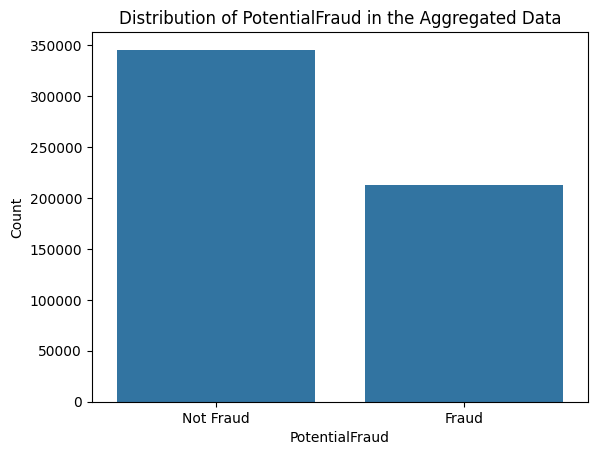

In [53]:
# using the 'training_data_with_provider' dataset, plot the distribution of the 'PotentialFraud' feature
labels = ['Not Fraud', 'Fraud']

sns.countplot(data=training_data_with_provider, x='PotentialFraud')
plt.title('Distribution of PotentialFraud in the Aggregated Data')
plt.xticks(range(2), labels)
plt.xlabel('PotentialFraud')
plt.ylabel('Count')
plt.show()

Here, we can see that the number of fraud cases are less than the non-fraud cases.

Plot the distribution of PotentialFraud in the Provider Data

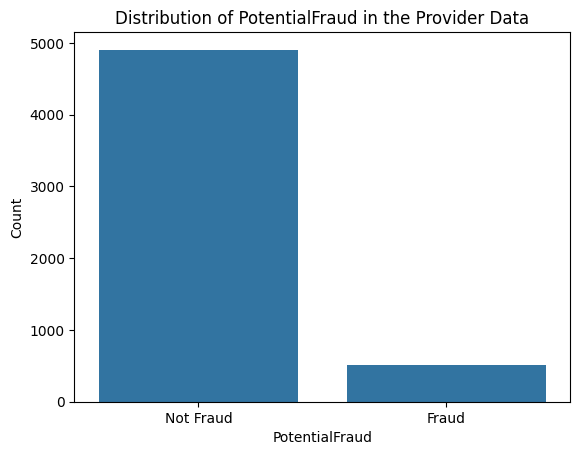

In [54]:
# Plot the frequencies of 'Non-Fraud' vs 'Fraud' in the provider data
labels = ['Not Fraud', 'Fraud']

sns.countplot(data=training_provider_df, x='PotentialFraud')
plt.title('Distribution of PotentialFraud in the Provider Data')
plt.xticks(range(2), labels)
plt.xlabel('PotentialFraud')
plt.ylabel('Count')
plt.show()

Calculate the Percentage distribution of **Fraud** and **Non-Fraud**

In [55]:
# Calculate the percentage of both the class-labels in "Aggregated_Data" and "Provider_Data"
count_classes_aggregated_data = pd.Series(training_data_with_provider['PotentialFraud']).value_counts()
print(f'Percentage Distribution of PotentialFraud in Aggregated Data: \n{count_classes_aggregated_data * 100 / len(training_data_with_provider)}')

count_classes_provider_data = pd.Series(training_provider_df['PotentialFraud']).value_counts()
print(f'\n\nPercentage Distribution of Potantial Fraud in Provider Data: \n{count_classes_provider_data * 100 / len(training_provider_df)}')

Percentage Distribution of PotentialFraud in Aggregated Data: 
PotentialFraud
No     61.878931
Yes    38.121069
Name: count, dtype: float64


Percentage Distribution of Potantial Fraud in Provider Data: 
PotentialFraud
No     90.64695
Yes     9.35305
Name: count, dtype: float64


Here, we can see that almost ~10% cases are in the Fraud category.
</br>
</br>
In the **Aggregated Data**, ~38% cases are from Fraud category while rest of the cases are from Non-Fraudulent category.
 

In [56]:
training_data_with_provider.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admit_For_Days', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depres

Statewise Beneficiary distribution: 
State
5     8.698288
10    7.052022
45    6.336788
33    6.093565
39    4.370074
14    4.274806
36    3.872802
23    3.820116
34    3.340887
31    2.976414
11    2.808973
49    2.614827
44    2.446664
22    2.386039
15    2.361500
26    2.243136
50    2.015791
52    1.921245
1     1.887324
21    1.854846
42    1.821646
18    1.818037
3     1.728543
24    1.562545
19    1.442016
37    1.390052
4     1.311383
6     1.304166
16    1.260140
25    1.170646
7     1.156211
38    1.059499
17    0.966396
54    0.892780
51    0.874737
20    0.671930
28    0.653166
32    0.645948
46    0.614192
29    0.542741
30    0.528306
13    0.495828
27    0.388291
12    0.349317
43    0.335604
41    0.316118
8     0.299518
47    0.295909
35    0.219406
53    0.212910
9     0.154450
2     0.141459
Name: count, dtype: float64


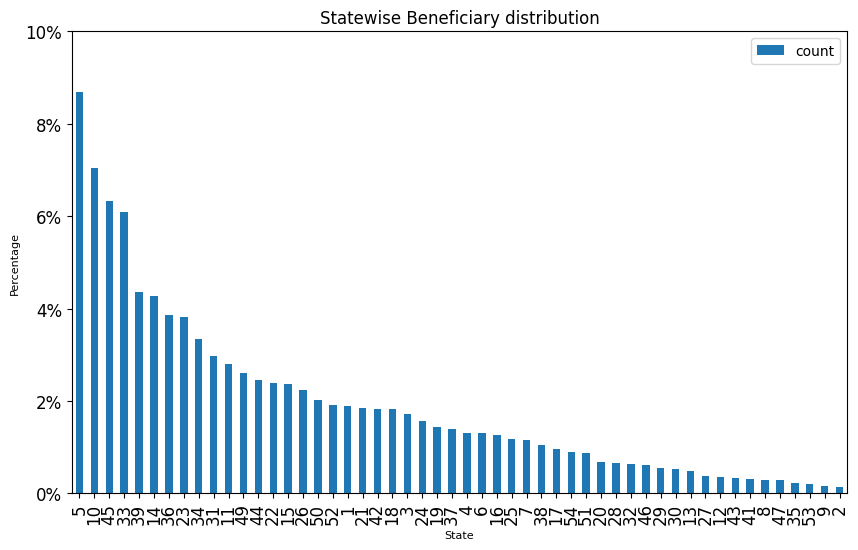

In [57]:
# analysis the beneficiary distribution using 'State' feature
count_statewise = pd.Series(training_beneficiary_df['State']).value_counts()
percentage_statewise = count_statewise*100/len(training_beneficiary_df['State'])

print(f'Statewise Beneficiary distribution: \n{percentage_statewise}')

# draw a "barplot"
percentage_statewise.plot(kind='bar', figsize=(10, 6), fontsize=12, legend=True)
plt.title('Statewise Beneficiary distribution')
plt.xlabel('State', fontsize=8)
plt.ylabel('Percentage', fontsize=8)
max_percentage = percentage_statewise.max()
ytick_values = np.arange(0, max_percentage + 2, 2)
ytick_labels = [f'{int(x)}%' for x in ytick_values]

plt.yticks(ticks=ytick_values, labels=ytick_labels)
plt.show()

Above Plot shows top states with their beneficiary percentage distribution. States 5,10,45 are top states in terms of beneficiary percentage

In [58]:
training_data_with_provider.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Admit_For_Days', 'DOB', 'DOD', 'Gender', 'Race',
       'RenalDiseaseIndicator', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depres

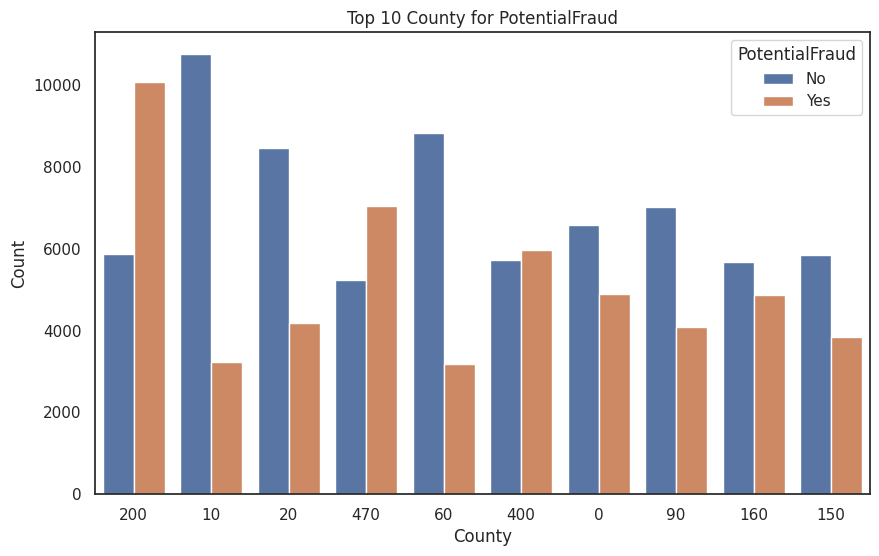

In [59]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='County', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['County'].value_counts().iloc[:10].index
                )

plt.title('Top 10 County for PotentialFraud')
plt.xlabel('County')
plt.ylabel('Count')
plt.show()

From the above plot, we observe that almost same 'County' codes have similar percentages of fraudulent and non-fraudulent claims.
</br>
</br>
In case of top-10 county with `Potential-Fraud`, the `County` codes 200 and 470 has more number of `Fraud` cases than `Non-Fraud` cases.

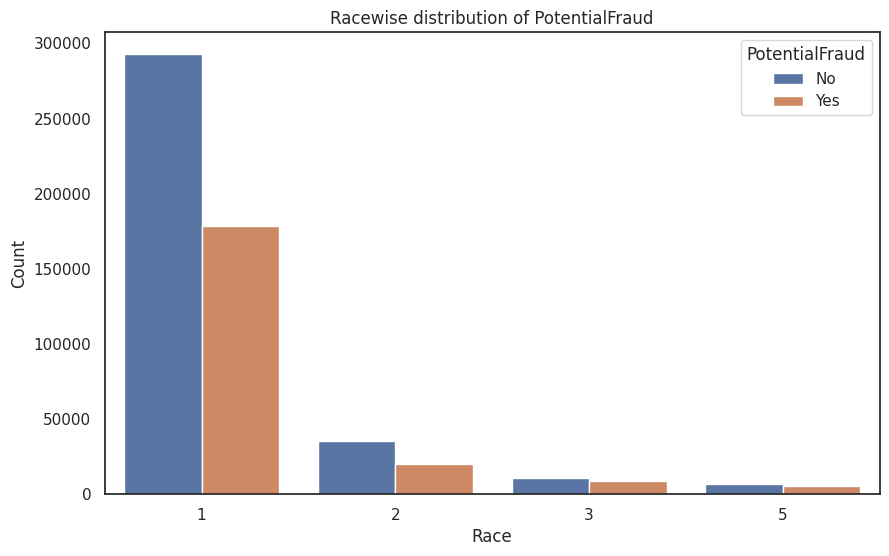

In [60]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='Race', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['Race'].value_counts().iloc[:10].index
                )

plt.title('Racewise distribution of PotentialFraud')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show() 

We can see the similar percentage for fraudulent and non-fraudulent cases for each Race. So, this feature is not helpful.

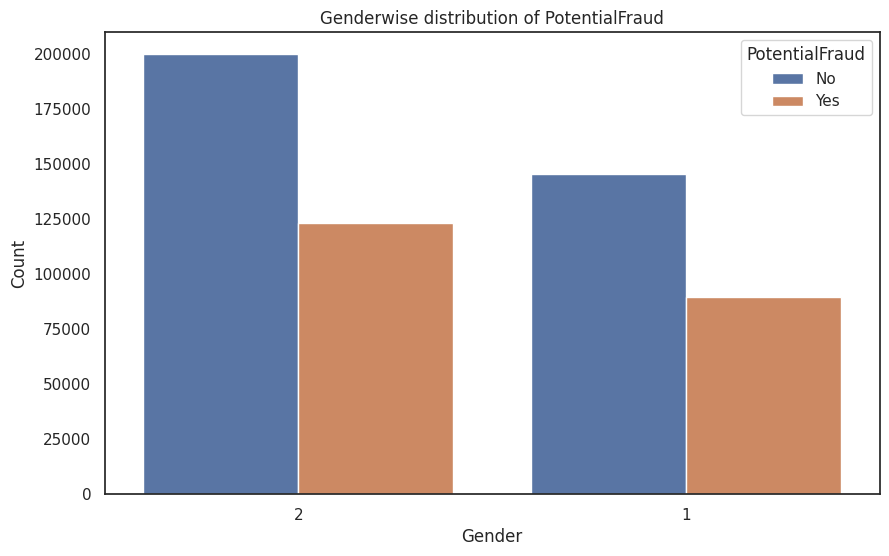

In [61]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='Gender', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['Gender'].value_counts().iloc[:10].index
                )

plt.title('Genderwise distribution of PotentialFraud')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

We can see the similar percentage for fraudulent and non-fraudulent cases for both the Gender. So, this feature is not helpful.

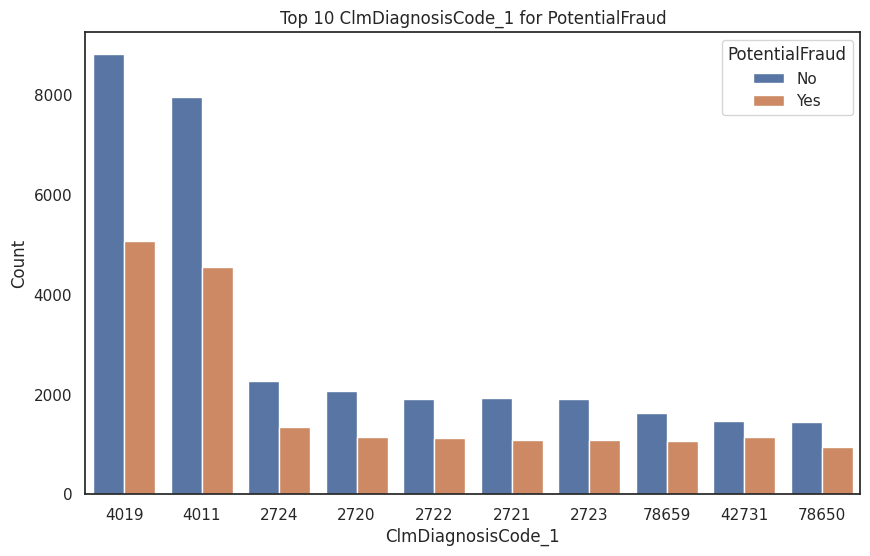

In [62]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='ClmDiagnosisCode_1', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['ClmDiagnosisCode_1'].value_counts().iloc[:10].index
                )

plt.title('Top 10 ClmDiagnosisCode_1 for PotentialFraud')
plt.xlabel('ClmDiagnosisCode_1')
plt.ylabel('Count')
plt.show()

From the above plot,we can say that diagnosis 4019, 4011, and 2724 are top diagnosis (in terms of money involved).
</br>
</br>
Distribution of fraud and non fraud counts shows suspicious transactions involved in them.

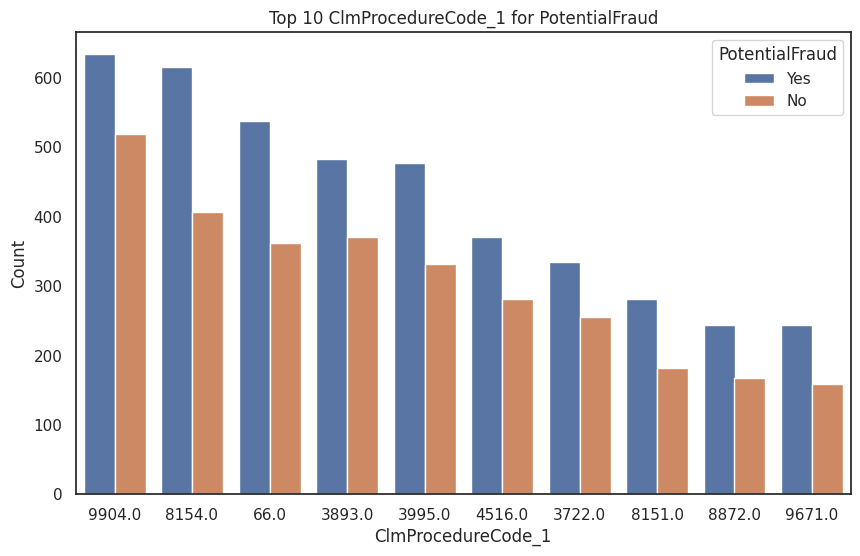

In [63]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='ClmProcedureCode_1', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['ClmProcedureCode_1'].value_counts().iloc[:10].index
                )

plt.title('Top 10 ClmProcedureCode_1 for PotentialFraud')
plt.xlabel('ClmProcedureCode_1')
plt.ylabel('Count')
plt.show()

From the above plot, we can say that Procedure 9904, 8154, and 66 are top procedures (in terms of money involved).
</br>
</br>
Distribution of fraud and non fraud count shows suspicious transactions involved in them.

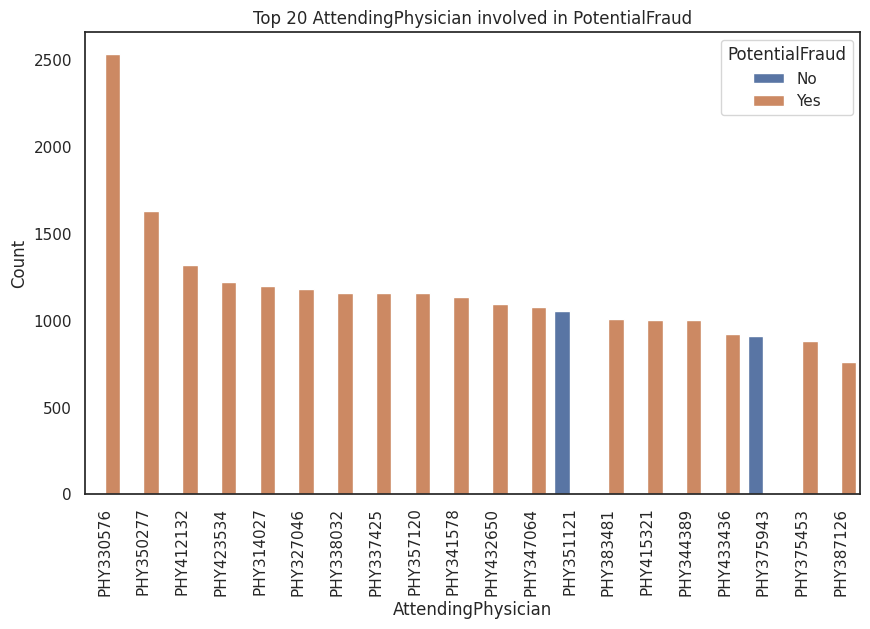

In [64]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='AttendingPhysician', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['AttendingPhysician'].value_counts().iloc[:20].index
                )

plt.title('Top 20 AttendingPhysician involved in PotentialFraud')
plt.xlabel('AttendingPhysician')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In the above plot,we see count of involvement of attending physicians.And flags the nature of provider where they are working is whether fraud or non fraud.
</br>
</br>
We can say that Attending Physician PHY330576, PHY350277, and PHY412132 are top Attending Physician (in terms of number of frauds)

In [65]:
# calculate the total number of instance where 'OperatingPhysician' is PHY330576
total_instances = training_data_with_provider[training_data_with_provider['OperatingPhysician'] == 'PHY330576'].shape[0]
print(f'Total number of instances where OperatingPhysician is PHY330576: {total_instances}')

Total number of instances where OperatingPhysician is PHY330576: 424


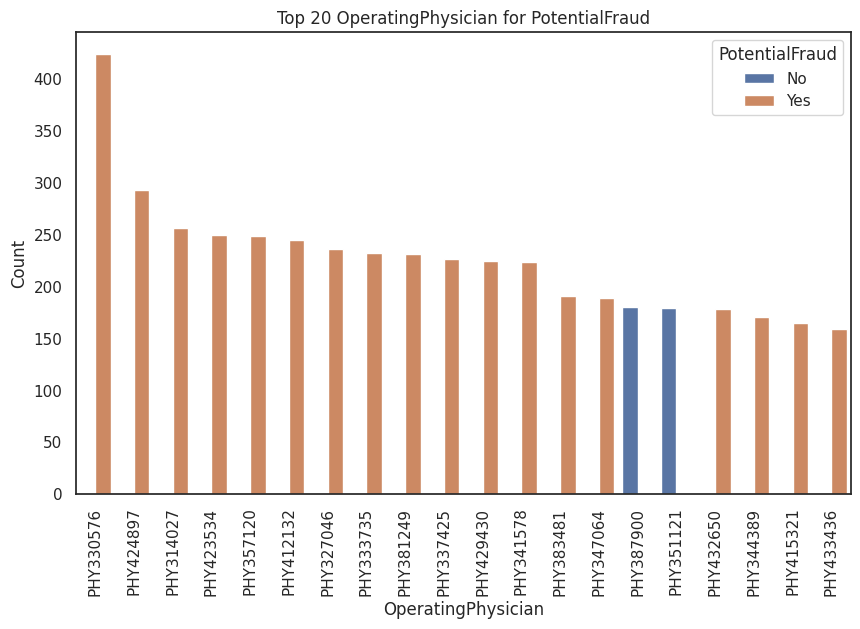

In [66]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='OperatingPhysician', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['OperatingPhysician'].value_counts().iloc[:20].index
                )

plt.title('Top 20 OperatingPhysician for PotentialFraud')
plt.xlabel('OperatingPhysician')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In the above plot, we see count of involvement of Operating Physicians.
</br>
</br>
We can say that Operating Physician PHY330576, PHY424897, and PHY314027 are top Operating Physician (in terms of number of frauds)

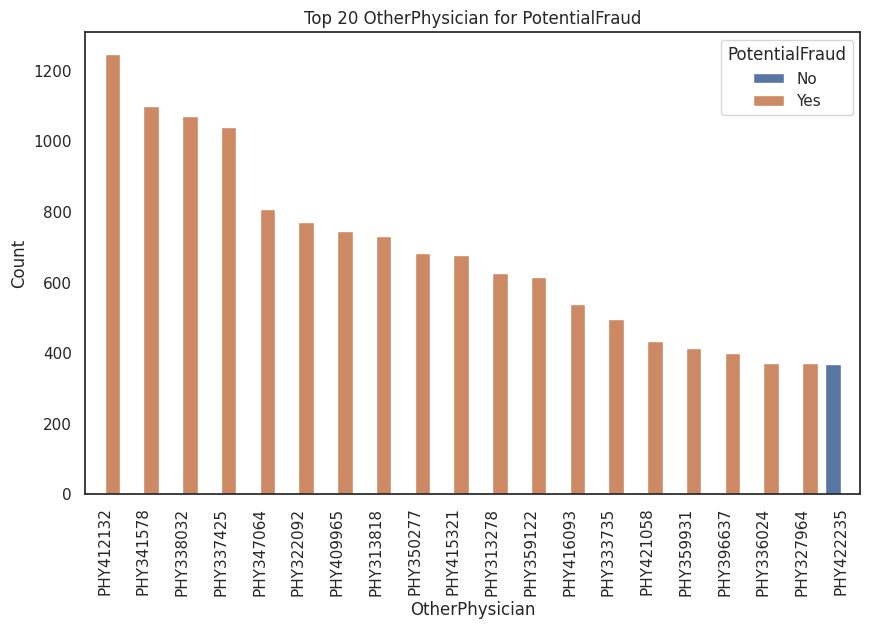

In [67]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='OtherPhysician', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['OtherPhysician'].value_counts().iloc[:20].index
                )

plt.title('Top 20 OtherPhysician for PotentialFraud')
plt.xlabel('OtherPhysician')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In the above plot, we see count of involvement of Other Physicians.
</br>
</br>
We can say that Other Physician PHY412132, PHY341578, PHY338032, and PHY337425 are top Other Physician (in terms of number of frauds)

#### Age Groups for Fraudulent Cases

In [68]:
def assign_age_group(age):
    if age >= 1 and age <=30:
        return 'Young'
    elif age > 30 and age <=60:
        return 'Mid'
    
    elif age > 60 and age <= 80:
        return 'Old'
    else:
        return 'Very Old'
    

training_data_with_provider['Age_Group'] = training_data_with_provider['Age'].apply(assign_age_group)
training_data_with_provider['Age_Group'].value_counts()

Age_Group
Old         314151
Very Old    171579
Mid          68973
Young         3508
Name: count, dtype: int64

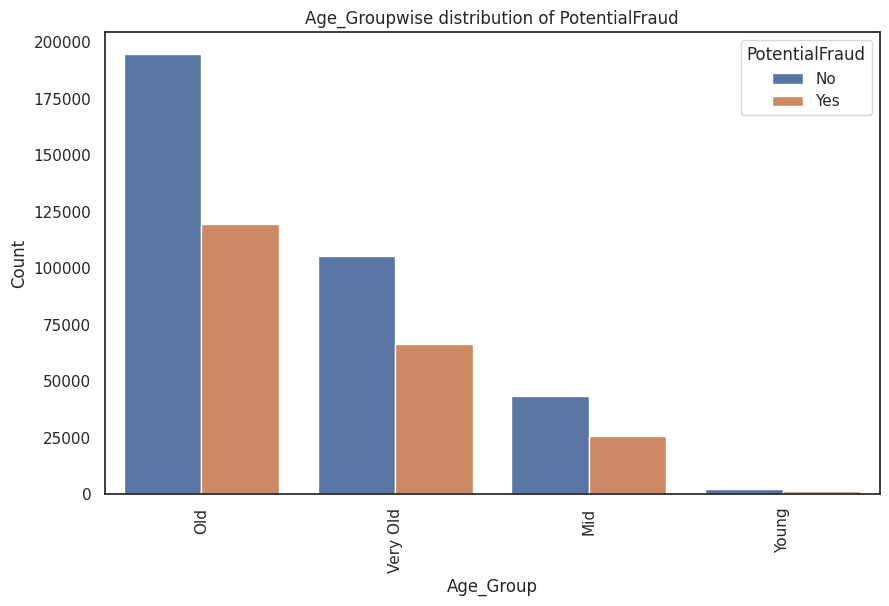

In [69]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

ax = sns.countplot(data=training_data_with_provider, 
                    x='Age_Group', 
                    hue='PotentialFraud',
                    order = training_data_with_provider['Age_Group'].value_counts().iloc[:20].index
                )

plt.title('Age_Groupwise distribution of PotentialFraud')
plt.xlabel('Age_Group')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

From here, we can observe that most of the fraudulent cases are for the age group of old and very old people.
</br>
</br>
Also, we can clearly see that tendency (similar percentage) of fraudulent and non-fraudulent claims for each age-group.

Text(0.5, 1.0, 'IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non-fraud categories')

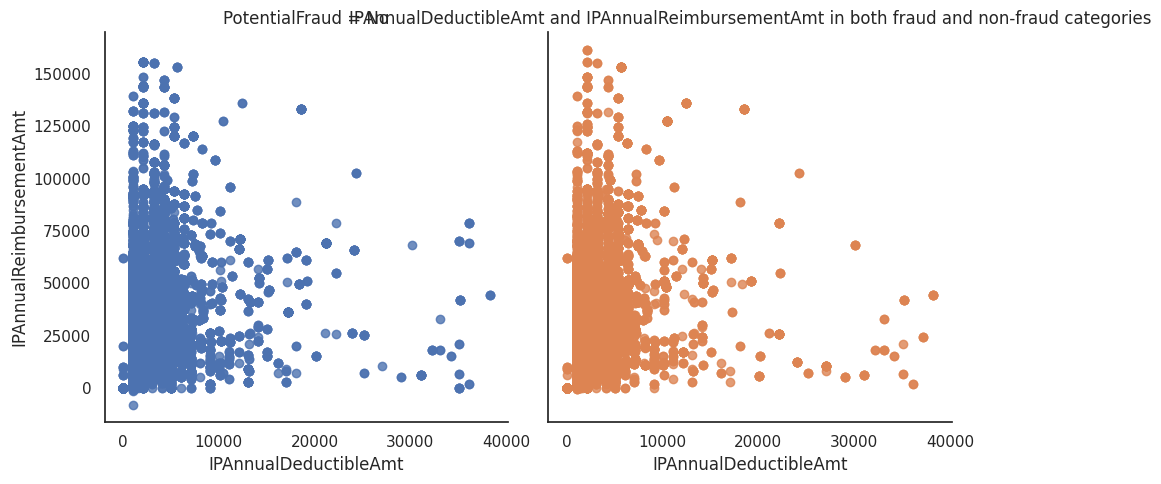

In [70]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

sns.lmplot(
    data=training_data_with_provider,
    x='IPAnnualDeductibleAmt',
    y='IPAnnualReimbursementAmt',
    col='PotentialFraud',
    hue='PotentialFraud',
    fit_reg=False,
)

plt.title('IPAnnualDeductibleAmt and IPAnnualReimbursementAmt in both fraud and non-fraud categories')

As we see in the above graph,there is no visible difference in IpAnnualDeductibleAmt and IPAnnualReimbursementAmt.

Text(0.5, 1.0, 'DeductibleAmtPaid and InscClaimAmtReimbursed in both fraud and non-fraud categories')

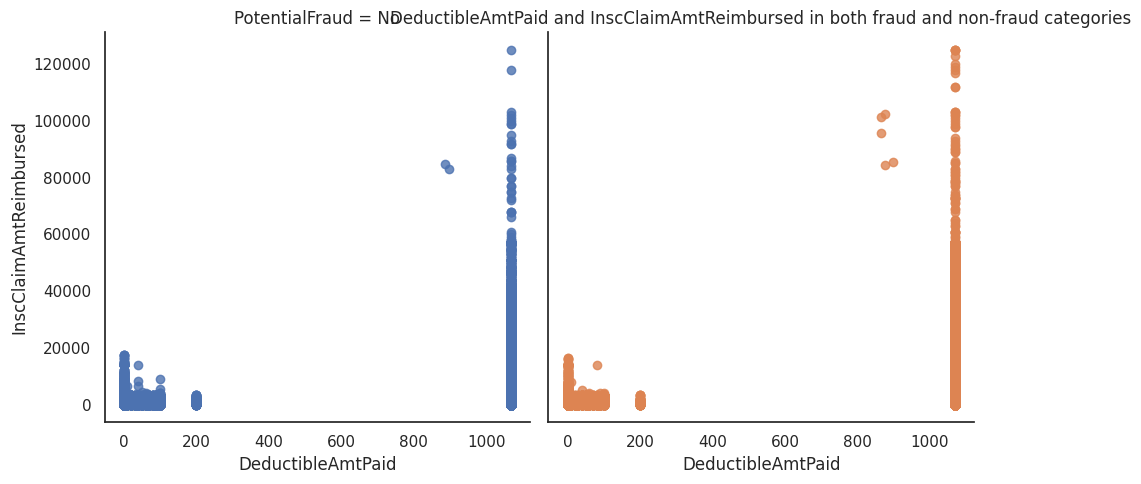

In [71]:
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

sns.lmplot(
    data=training_data_with_provider,
    x='DeductibleAmtPaid',
    y='InscClaimAmtReimbursed',
    col='PotentialFraud',
    hue='PotentialFraud',
    fit_reg=False,
)

plt.title('DeductibleAmtPaid and InscClaimAmtReimbursed in both fraud and non-fraud categories')

We can not differentiate between fraud and non fraud cases based only on DeductibleAmtPaid and 
InscClaimAmtReimbursed.This lets us derive more features from datasets.

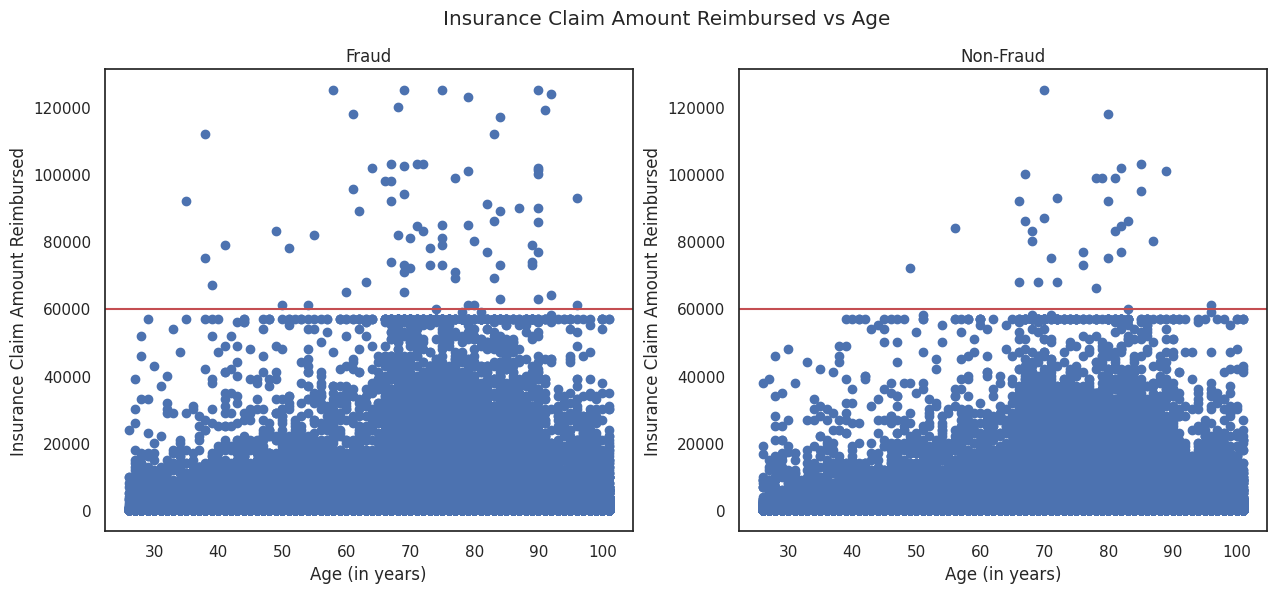

In [72]:
# Insurance Claim Amount Reimbursed vs Age
sns.set(rc={'figure.figsize':(10, 6)}, style='white')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
f.suptitle('Insurance Claim Amount Reimbursed vs Age')

# First Sub-plot
ax1.scatter(training_data_with_provider[training_data_with_provider['PotentialFraud']=='Yes']['Age'],
            training_data_with_provider[training_data_with_provider['PotentialFraud']=='Yes']['InscClaimAmtReimbursed']
)
ax1.set_title('Fraud')
ax1.axhline(y=60000, c='r')
ax1.set_xlabel('Age (in years)')
ax1.set_ylabel('Insurance Claim Amount Reimbursed')

# Second Sub-plot
ax2.scatter(training_data_with_provider[training_data_with_provider['PotentialFraud']=='No']['Age'],
            training_data_with_provider[training_data_with_provider['PotentialFraud']=='No']['InscClaimAmtReimbursed']
)
ax2.set_title('Non-Fraud')
ax2.axhline(y=60000, c='r')
ax2.set_xlabel('Age (in years)')
ax2.set_ylabel('Insurance Claim Amount Reimbursed')

plt.show()

We see that occurance of fraud cases is more frequent in lower age groups(30-70 years) compared to higher 
age groups(70+ years).
</br>
</br>
Age is one of the important feature for differentiating between fraud abd non fraud 
behaviour.

In [73]:
training_data_with_provider.shape

(558211, 59)

Now, look for the provider who have filed more than one claim.

In [74]:
# This is important because we are trying to predict the potential fraud providers.
# It can not be true for all the providers to be fraudulent. 
# But, it can be assumed that all the claims filed by a potentially fraud provider are fraudulent.

# Count the number of claims filed by each provider
providers_claims_df = pd.DataFrame(training_data.groupby(['Provider'])['ClaimID'].count()).reset_index()
providers_claims_df

,Provider,ClaimID
0,PRV51001,25
1,PRV51003,132
2,PRV51004,149
3,PRV51005,1165
4,PRV51007,72
...,...,...
5405,PRV57759,28
5406,PRV57760,22
5407,PRV57761,82
5408,PRV57762,1


In [75]:
training_provider_df.shape

(5410, 2)

In [76]:
providers_claims_tgt_df = pd.merge(left=providers_claims_df, right=training_provider_df, on='Provider', how='inner')
providers_claims_tgt_df

,Provider,ClaimID,PotentialFraud
0,PRV51001,25,No
1,PRV51003,132,Yes
2,PRV51004,149,No
3,PRV51005,1165,Yes
4,PRV51007,72,No
...,...,...,...
5405,PRV57759,28,No
5406,PRV57760,22,No
5407,PRV57761,82,No
5408,PRV57762,1,No


From the above table, we can see that Provider PRV51004 has filed the 149 claims and provider PRV51005 has filed 1165 claims.
